
Edad: Edad del paciente

Sexo: Sexo del paciente

exang: angina inducida por ejercicio (1 = sí; 0 = no)

ca: número de vasos principales (0-3)

cp: Tipo de dolor en el pecho

Valor 1: angina típica

Valor 2: angina atípica

Valor 3: dolor no anginal

Valor 4: asintomático

trtbps: presión arterial en reposo (en mm Hg)

chol: colesterol en mg/dl obtenido a través del sensor de IMC

fbs: (azúcar en sangre en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)

rest_ecg: resultados electrocardiográficos en reposo

Valor 0: normal

Valor 1: con anormalidad en la onda ST-T (inversiones de onda T y/o elevación o depresión del segmento ST > 0.05 mV)

Valor 2: mostrando hipertrofia ventricular izquierda probable o definida según los criterios de Estes

thalach: frecuencia cardíaca máxima alcanzada

target: 0 = menor probabilidad de ataque cardíaco, 1 = mayor probabilidad de ataque cardíaco

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [16]:
df.shape

(303, 14)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [19]:
# Miramos correlaciones
corr_matrix = df.corr()
corr_matrix["output"].sort_values(ascending=False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

Como podemos ver las caracteristicas con mayor correlación son el tipo de dolor que tienen y los latidos por minuto algo que logicamente suena coherente.

In [20]:
df["output"].value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [21]:
df.isna().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

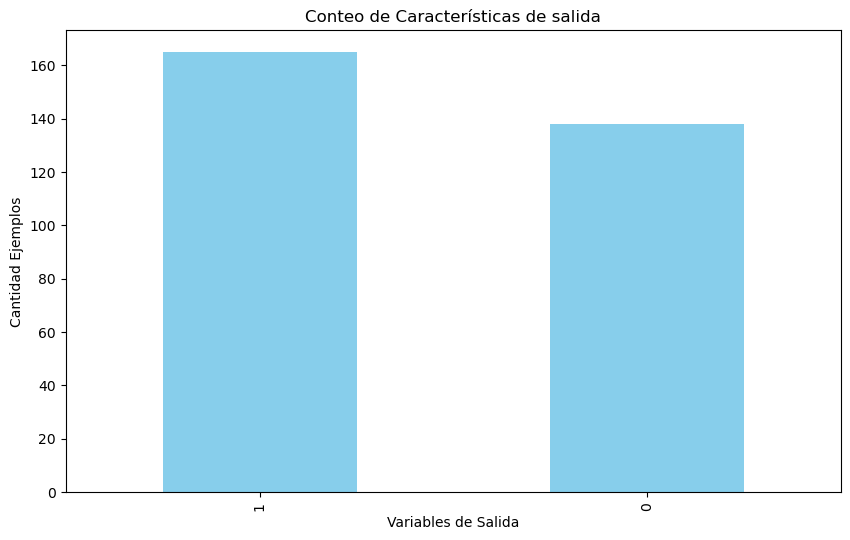

In [22]:
import matplotlib.pyplot as plt
import pandas as pd


# Obtener la cantidad de ejemplos de cada variable de salida
conteo_caracteristica = df['output'].value_counts()


plt.figure(figsize=(10, 6)) 
conteo_caracteristica.plot(kind='bar', color='skyblue') 
plt.title('Conteo de Características de salida')  
plt.xlabel('Variables de Salida')  
plt.ylabel('Cantidad Ejemplos')  
plt.show()


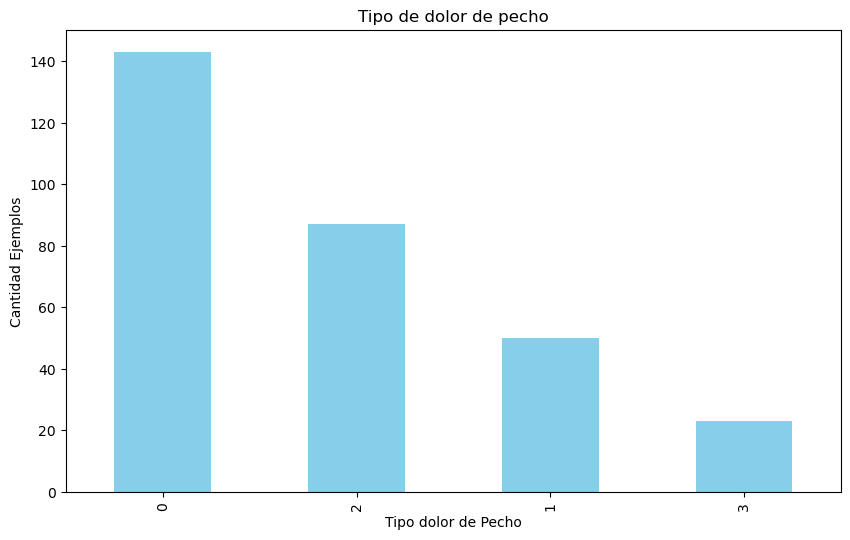

In [23]:
# Obtener la cantidad de cada característica, tipo de dolor de pecho
conteo_caracteristica = df['cp'].value_counts()

plt.figure(figsize=(10, 6))  
conteo_caracteristica.plot(kind='bar', color='skyblue') 
plt.title('Tipo de dolor de pecho') 
plt.xlabel('Tipo dolor de Pecho')  
plt.ylabel('Cantidad Ejemplos') 
plt.show()

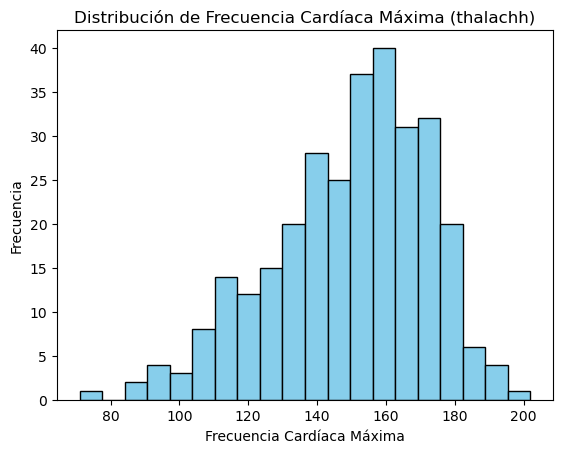

In [24]:
# Graficar las frecuencias
df['thalachh'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Frecuencia Cardíaca Máxima (thalachh)')
plt.xlabel('Frecuencia Cardíaca Máxima')
plt.ylabel('Frecuencia')
plt.show()


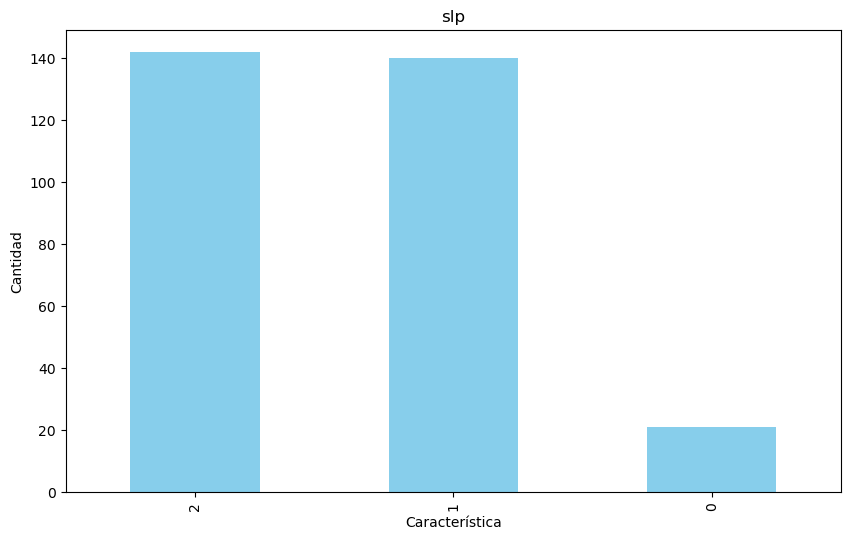

In [25]:
# Obtener el conteo de slp
conteo_caracteristica = df['slp'].value_counts()
plt.figure(figsize=(10, 6)) 
conteo_caracteristica.plot(kind='bar', color='skyblue')
plt.title('slp') 
plt.xlabel('Característica') 
plt.ylabel('Cantidad') 
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [27]:
# División del conjunto de datos
train_set, val_set, test_set = train_val_test_split(df)

In [28]:
X_train = train_set.drop("output", axis=1)
y_train = train_set["output"].copy()

X_val = val_set.drop("output", axis=1)
y_val = val_set["output"].copy()

X_test = test_set.drop("output", axis=1)
y_test = test_set["output"].copy()

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

c:\Users\sergi\anaconda3\envs\MachineLearningMAIN\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred = clf.predict(X_val)

In [31]:
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_pred, y_val))

F1 Score: 0.8571428571428572


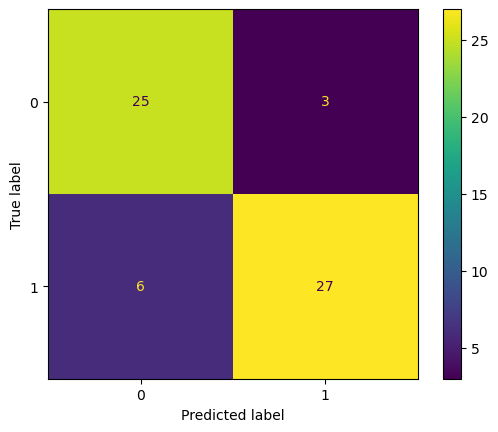

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
 
ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val)
plt.show()

Probamos con las caracteristicas con mas correlación para ver si sube el f1 score y reduciendo el cojunto de datos

In [33]:
df_mod = df[['cp', 'thalachh', 'slp', 'restecg', 'output']].copy()

In [34]:
train_set, val_set, test_set = train_val_test_split(df_mod)

In [35]:
X_train = train_set.drop("output", axis=1)
y_train = train_set["output"].copy()

X_val = val_set.drop("output", axis=1)
y_val = val_set["output"].copy()

X_test = test_set.drop("output", axis=1)
y_test = test_set["output"].copy()

In [36]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = clf.predict(X_val)

In [38]:
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_pred, y_val))

F1 Score: 0.7666666666666667


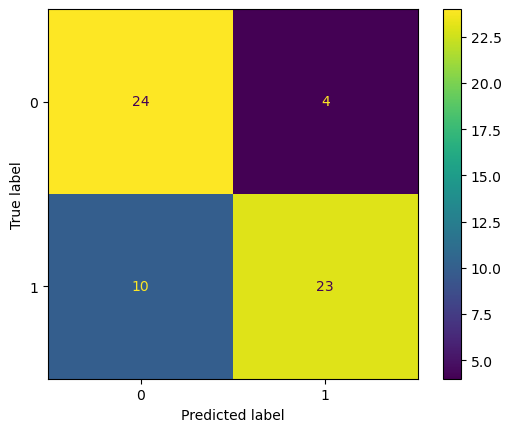

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
 
ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val)
plt.show()

## Support Vector Classification

In [40]:
# División del conjunto de datos
train_set, val_set, test_set = train_val_test_split(df)

X_train = train_set.drop("output", axis=1)
y_train = train_set["output"].copy()

X_val = val_set.drop("output", axis=1)
y_val = val_set["output"].copy()

X_test = test_set.drop("output", axis=1)
y_test = test_set["output"].copy()

In [41]:
# Entrenamiento con todo el conjunto de datos
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=5)
svm_clf.fit(X_train, y_train)

SVC(C=5, kernel='linear')

In [42]:
y_pred = svm_clf.predict(X_val)

In [43]:
print("F1 Score:", f1_score(y_pred, y_val))

F1 Score: 0.8709677419354839


Mejor puntuación obtenida hasta ahora, ahora probaremos ajustando hiperparametros con grid search

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [100000, 1000000],  
    'gamma': [0.0001, 0.00001], 

}


svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
# Ejecutamos GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [100000, 1000000], 'gamma': [0.0001, 1e-05]},
             scoring='accuracy')

In [45]:
grid_search.best_params_

{'C': 100000, 'gamma': 1e-05}

In [46]:
y_pred = grid_search.predict(X_val)
print("F1 Score:", f1_score(y_pred, y_val))

F1 Score: 0.7999999999999999


## Probamos a entrenar el modelo con todo el conjunto de datos 

In [50]:
X = df.drop(['output'],axis=1)
y = df[['output']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [51]:
# Entrenamiento con todo el conjunto de datos
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=5)
svm_clf.fit(X_train, y_train)

c:\Users\sergi\anaconda3\envs\MachineLearningMAIN\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=5, kernel='linear')

In [52]:
from sklearn.metrics import accuracy_score, f1_score

# Hacer predicciones
y_pred = svm_clf.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


Accuracy: 0.8852459016393442
F1-score: 0.8888888888888888


### NUEVO CASO INVENTADO

In [54]:
nuevo_ejemplo = {
    'age': 20,      
    'sex': 0,       
    'cp': 0,        
    'trtbps': 120,  
    'chol': 100,    
    'fbs': 0,       
    'restecg': 1,   
    'thalachh': 60, 
    'exng': 1,       
    'oldpeak': 0.6,  
    'slp': 2,        
    'caa': 0,        
    'thall': 2      
}

nuevo_ejemplo = pd.DataFrame([nuevo_ejemplo])

prediction = svm_clf.predict(nuevo_ejemplo)


if prediction == 1:
    print("Sufre posibildad alta de ataque cardiaco")
else:
    print("Posibilidad baja de ataque cardiaco")



Posibilidad baja de ataque cardiaco


### Introducir nuevos ejemplos por teclado

In [37]:
# Solicitar al usuario que ingrese los valores por teclado
age = int(input("Edad del paciente: "))
sex = int(input("Sexo del paciente (1 para hombre, 0 para mujer): "))
cp = int(input("Tipo de dolor en el pecho (1 para angina típica, 2 para angina atípica, 3 para dolor no anginal, 4 para asintomático): "))
trtbps = int(input("Presión arterial en reposo (mm Hg): "))
chol = int(input("Colesterol sérico (mg/dl): "))
fbs = int(input("Azúcar en sangre en ayunas > 120 mg/dl (1 para verdadero, 0 para falso): "))
restecg = int(input("Resultados electrocardiográficos en reposo (0 para normal, 1 para con anormalidad en la onda ST-T, 2 para mostrando hipertrofia ventricular izquierda): "))
thalachh = int(input("Frecuencia cardíaca máxima alcanzada: "))
exng = int(input("Angina inducida por ejercicio (1 para sí, 0 para no): "))
oldpeak = float(input("Depresión del segmento ST inducida por el ejercicio en relación con el descanso: "))
slp = int(input("Pendiente del segmento ST en ejercicio máximo (0, 1, o 2): "))
caa = int(input("Número de vasos principales (0-3) coloreados por fluoroscopia: "))
thall = int(input("Resultado del test thalium (0, 1, 2, o 3): "))

# Crear un diccionario con los valores ingresados
user_input = {
    'age': age,
    'sex': sex,
    'cp': cp,
    'trtbps': trtbps,
    'chol': chol,
    'fbs': fbs,
    'restecg': restecg,
    'thalachh': thalachh,
    'exng': exng,
    'oldpeak': oldpeak,
    'slp': slp,
    'caa': caa,
    'thall': thall
}


user_input_df = pd.DataFrame([user_input])

# Hacer la predicción
prediction = svm_clf.predict(user_input_df)

if prediction == 1:
    print("Sufre posibildad alta de ataque cardiaco")
    print("Datos del paciente introducidos: ")
    print(user_input_df)
  
else:
    print("Posibilidad baja de ataque cardiaco")
    print("Datos del paciente introducidos: ")
    print(user_input_df)



Sufre posibildad alta de ataque cardiaco
Datos del paciente introducidos: 
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   20    1   2     180   140    1        1       200     0      0.8    0   

   caa  thall  
0    2      1  
